In [105]:
# Imported libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify as sq
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [106]:
# Read RFM_Final dataset
df = pd.read_csv('./datasets/1_SEGMENTATION/RFM_Final.csv')
df.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,POINTS_SPENT,loyalty_score,MODE_REGIONAL_CODE,OUTLET_ID,CATEGORY_ID,Percentage_SPECIAL,...,MODE_TRANSACTION_HOUR,MODE_WEEKDAY,LONGEVITY,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,Segment,Score_Card
0,AA00312188,24,102,1040,8760,1,11,64,10,0.0,...,14,3,5195,2,3,4,234,9,At risk,Silver
1,AA00312390,1,58,687,2240,1,42,91,3,0.0,...,16,5,4026,4,2,3,423,9,Potential loyalists,Silver
2,AA00325975,1,205,1386,80675,1,11,7,1,0.0,...,11,5,5500,4,4,4,444,12,Loyal customers,Platinum
3,AA00336843,14,69,498,24255,1,11,6,3,0.0,...,13,3,2146,2,3,2,232,7,At risk,Bronze
4,AA00339761,23,59,574,4030,1,6,7,10,0.0,...,17,4,5826,2,2,3,223,7,Hibernating,Bronze


In [107]:
# Create a copy dataset without the CUSTOMER_ID, Segment and Score_Card columns
df_copy = df.drop(columns=['CUSTOMER_ID', 'Segment', 'Score_Card'])
df_copy.head()

,Recency,Frequency,Monetary,POINTS_SPENT,loyalty_score,MODE_REGIONAL_CODE,OUTLET_ID,CATEGORY_ID,Percentage_SPECIAL,SPECIAL,...,MODE_ORIGIN,MODE_PAYMENT_METHOD,MODE_TRANSACTION_HOUR,MODE_WEEKDAY,LONGEVITY,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,24,102,1040,8760,1,11,64,10,0.0,0,...,3,0,14,3,5195,2,3,4,234,9
1,1,58,687,2240,1,42,91,3,0.0,0,...,3,0,16,5,4026,4,2,3,423,9
2,1,205,1386,80675,1,11,7,1,0.0,0,...,3,3,11,5,5500,4,4,4,444,12
3,14,69,498,24255,1,11,6,3,0.0,0,...,3,0,13,3,2146,2,3,2,232,7
4,23,59,574,4030,1,6,7,10,0.0,0,...,3,0,17,4,5826,2,2,3,223,7


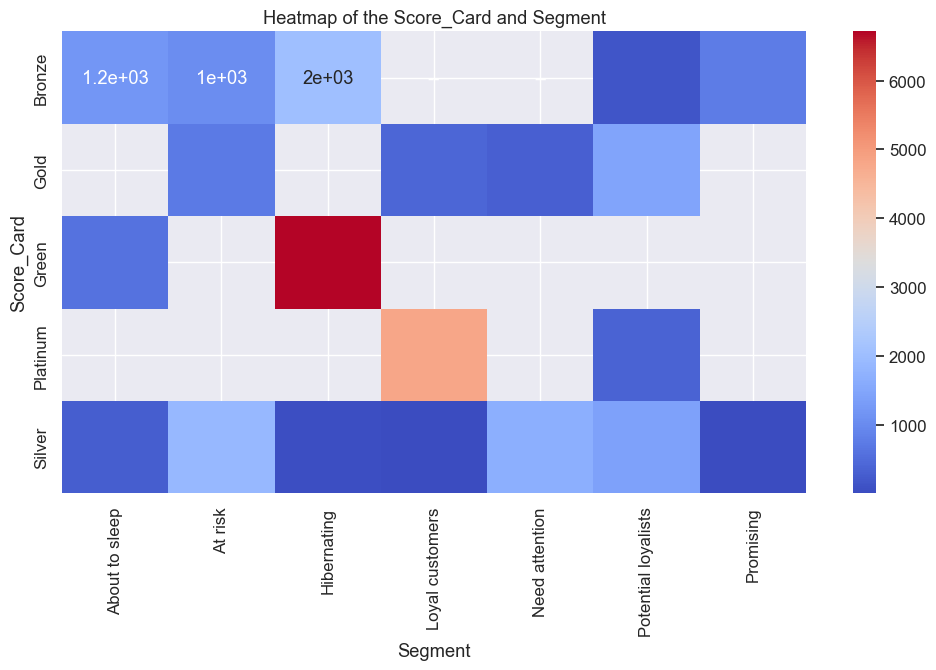

In [132]:
# Plot a heatmap of the Score_Card, Segment and Customer_ID columns
plt.figure(figsize=(12, 6))
sns.heatmap(df.groupby(['Score_Card', 'Segment']).size().unstack(), annot=True, cmap='coolwarm')
plt.title('Heatmap of the Score_Card and Segment')
plt.show()

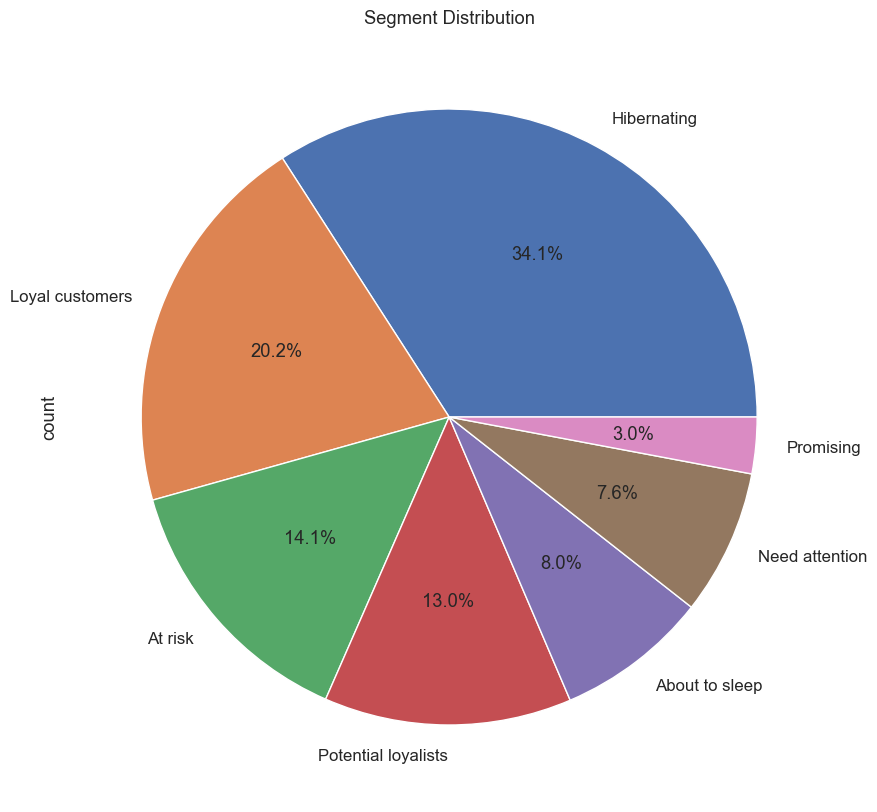

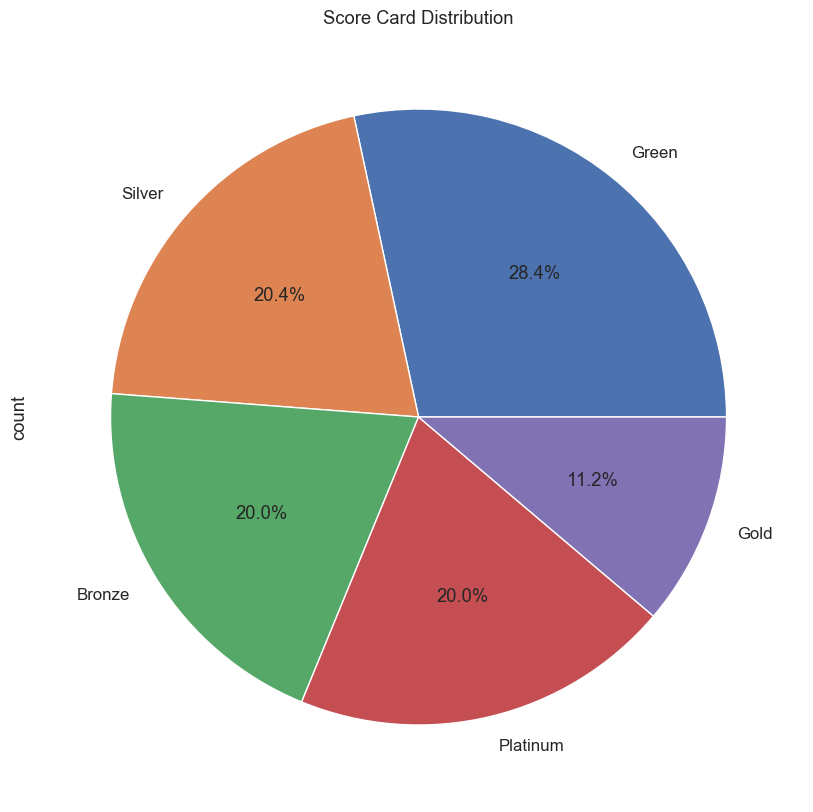

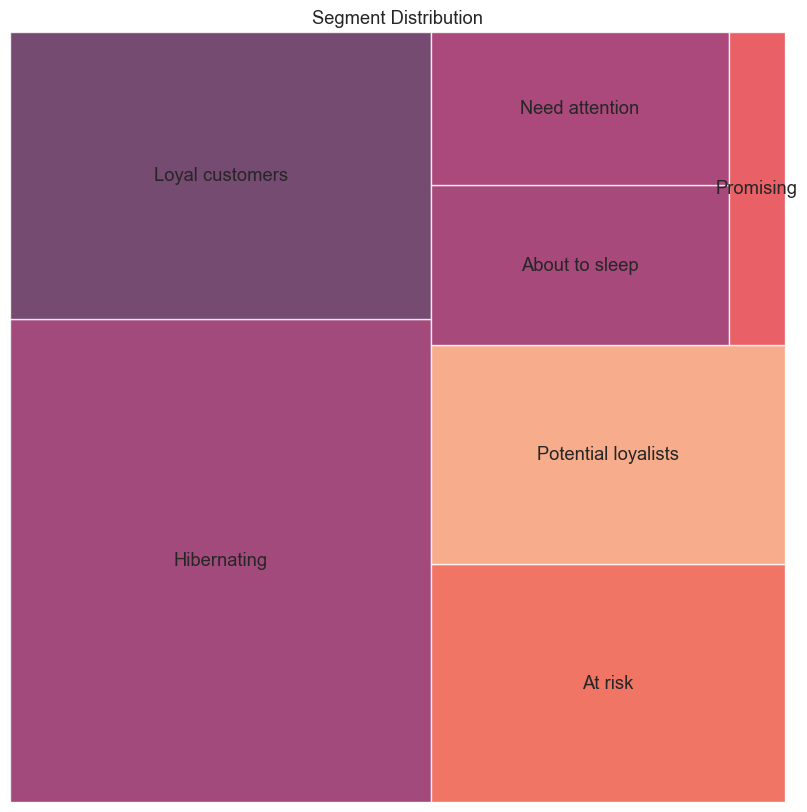

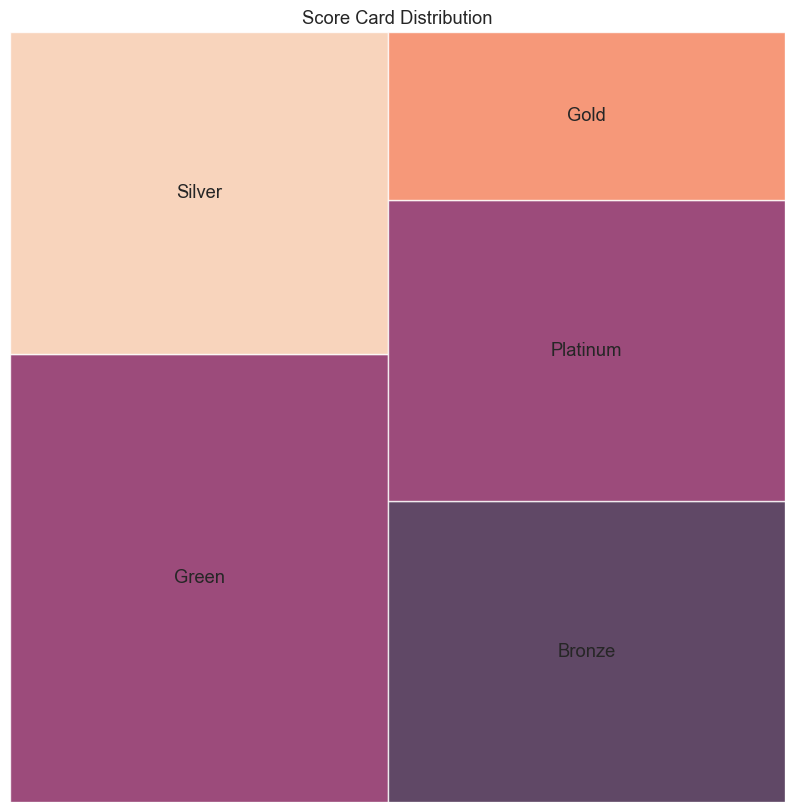

In [109]:
# Plot a pie chart to see the distribution of the segments
# Label each segment with the percentage of the total
plt.figure(figsize=(10, 10))
df['Segment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Segment Distribution')
plt.show()

# Plot a pie chart to see the distribution of the score cards
# Label each score card with the percentage of the total
plt.figure(figsize=(10, 10))
df['Score_Card'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Score Card Distribution')
plt.show()

# Plot a treemap to see the distribution of the segments
# Label each segment with the percentage of the total
plt.figure(figsize=(10, 10))
sq.plot(sizes=df['Segment'].value_counts(), label=df['Segment'].value_counts().index, alpha=0.8)
plt.axis('off')
plt.title('Segment Distribution')
plt.show()

# Plot a treemap to see the distribution of the score cards
# Label each score card with the percentage of the total
plt.figure(figsize=(10, 10))
sq.plot(sizes=df['Score_Card'].value_counts(), label=df['Score_Card'].value_counts().index, alpha=0.8)
plt.axis('off')
plt.title('Score Card Distribution')
plt.show()


In [110]:
# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_copy)

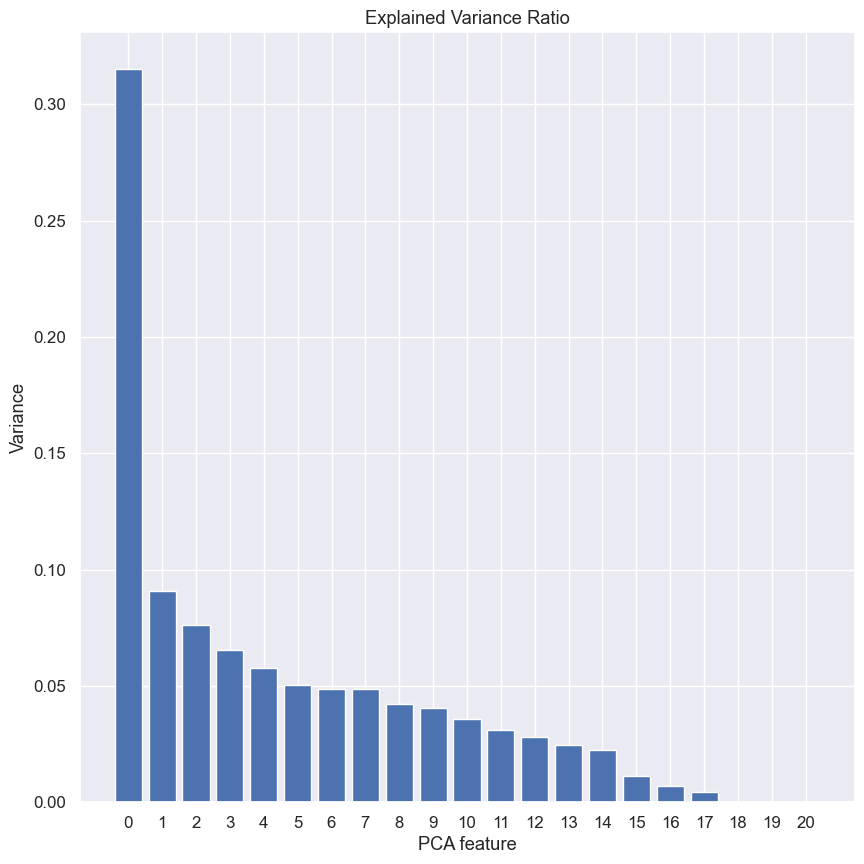

In [111]:
# Perform Principle Component Analysis (PCA)
pca_obj = PCA()

# Fit the PCA object to the scaled data
pca_obj.fit(df_scaled)
# PCA Features
features = range(pca_obj.n_components_)
# Transform the scaled data
df_pca = pca_obj.transform(df_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 10))
plt.bar(features, pca_obj.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title('Explained Variance Ratio')
plt.show()

In [112]:
# Create a new pca object
pca_2 = PCA(n_components=7)
# Fit the PCA object to the scaled data
df_scaled = pca_2.fit_transform(df_scaled)

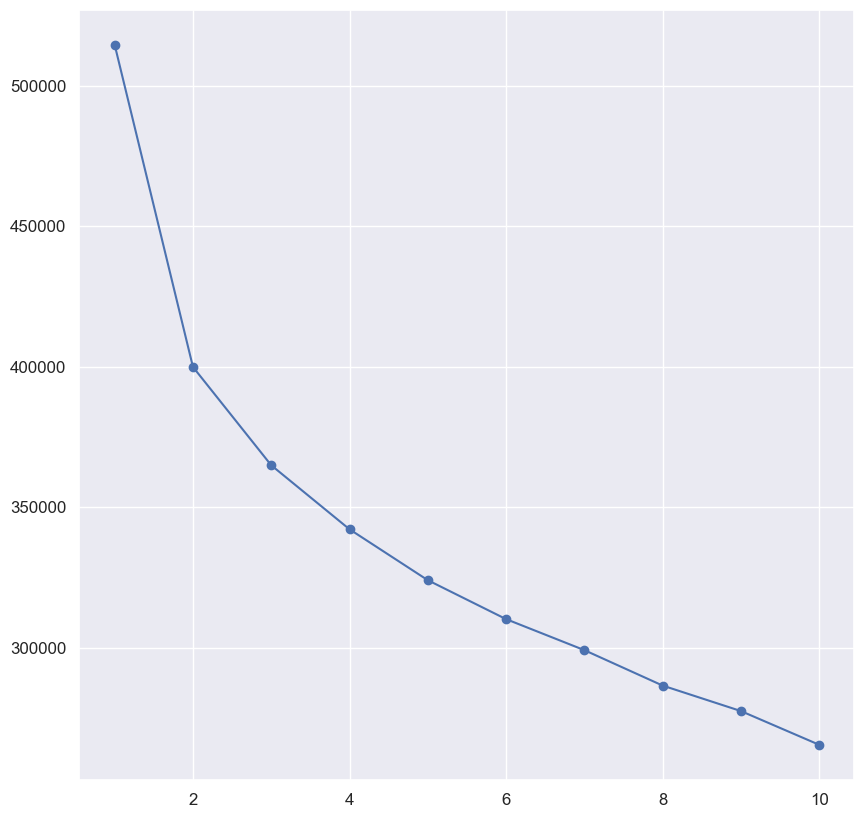

In [113]:
# Application of KMeans
# Create a list to store the inertia values
inertia = []

# Create a range of K values
k_values = range(1, 11)

# Loop through the K values
for k in k_values:
    # Create a KMeans object
    kmeans = KMeans(n_clusters=k, random_state=0)
    # Fit the KMeans object to the PCA data
    kmeans.fit(df_pca)
    # Append the inertia value to the list
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.figure(figsize=(10, 10))
plt.plot(k_values, inertia, marker='o')

In [114]:
# Selection of the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_

In [115]:
df.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,POINTS_SPENT,loyalty_score,MODE_REGIONAL_CODE,OUTLET_ID,CATEGORY_ID,Percentage_SPECIAL,...,MODE_WEEKDAY,LONGEVITY,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,Segment,Score_Card,Cluster
0,AA00312188,24,102,1040,8760,1,11,64,10,0.0,...,3,5195,2,3,4,234,9,At risk,Silver,2
1,AA00312390,1,58,687,2240,1,42,91,3,0.0,...,5,4026,4,2,3,423,9,Potential loyalists,Silver,2
2,AA00325975,1,205,1386,80675,1,11,7,1,0.0,...,5,5500,4,4,4,444,12,Loyal customers,Platinum,2
3,AA00336843,14,69,498,24255,1,11,6,3,0.0,...,3,2146,2,3,2,232,7,At risk,Bronze,2
4,AA00339761,23,59,574,4030,1,6,7,10,0.0,...,4,5826,2,2,3,223,7,Hibernating,Bronze,2


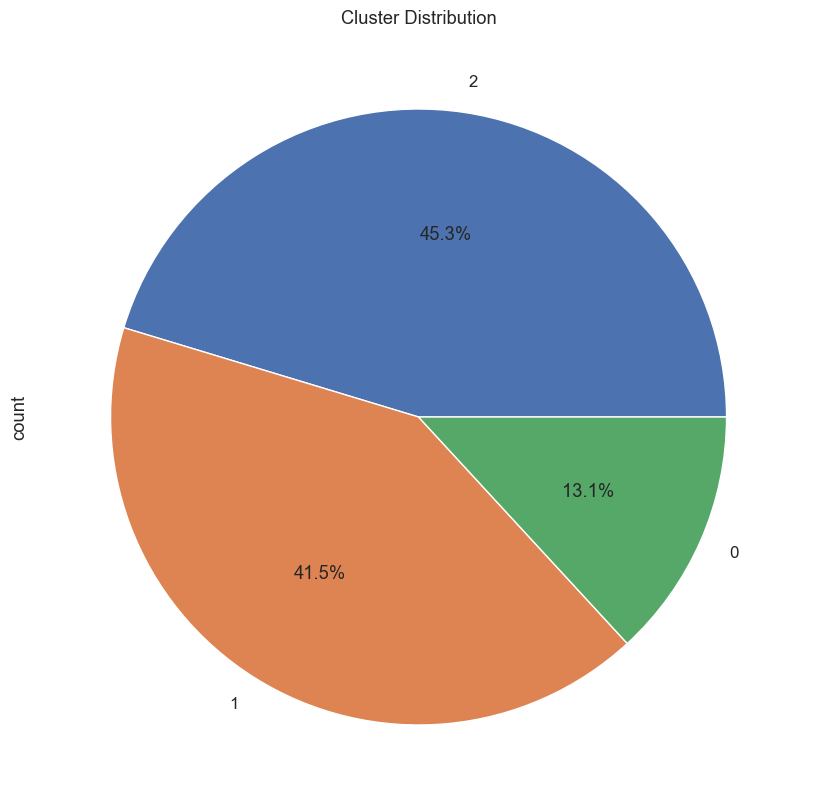

In [116]:
# Plot a pie chart to see the distribution of the clusters
# Label each cluster with the percentage of the total
plt.figure(figsize=(10, 10))
df['Cluster'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Cluster Distribution')
plt.show()

In [ ]:
# Create a linkage matrix
linkage_matrix = linkage(df_scaled, 'ward')

# Plot the dendrogram
plt.figure(figsize=(50, 20))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.show()

In [119]:
# Apply hierarchical clustering
# Create a DBSCAN object
dbscan = DBSCAN(eps=2, min_samples=5)
# Fit the DBSCAN object to the PCA data
df['DBSCAN'] = dbscan.fit_predict(df_scaled)

In [121]:
df.columns

Index(['CUSTOMER_ID', 'Recency', 'Frequency', 'Monetary', 'POINTS_SPENT',
       'loyalty_score', 'MODE_REGIONAL_CODE', 'OUTLET_ID', 'CATEGORY_ID',
       'Percentage_SPECIAL', 'SPECIAL', 'Mean_SPECIAL', 'MODE_ORIGIN',
       'MODE_PAYMENT_METHOD', 'MODE_TRANSACTION_HOUR', 'MODE_WEEKDAY',
       'LONGEVITY', 'R_quartile', 'F_quartile', 'M_quartile', 'RFM_Segment',
       'RFM_Score', 'Segment', 'Score_Card', 'Cluster', 'DBSCAN'],
      dtype='object')

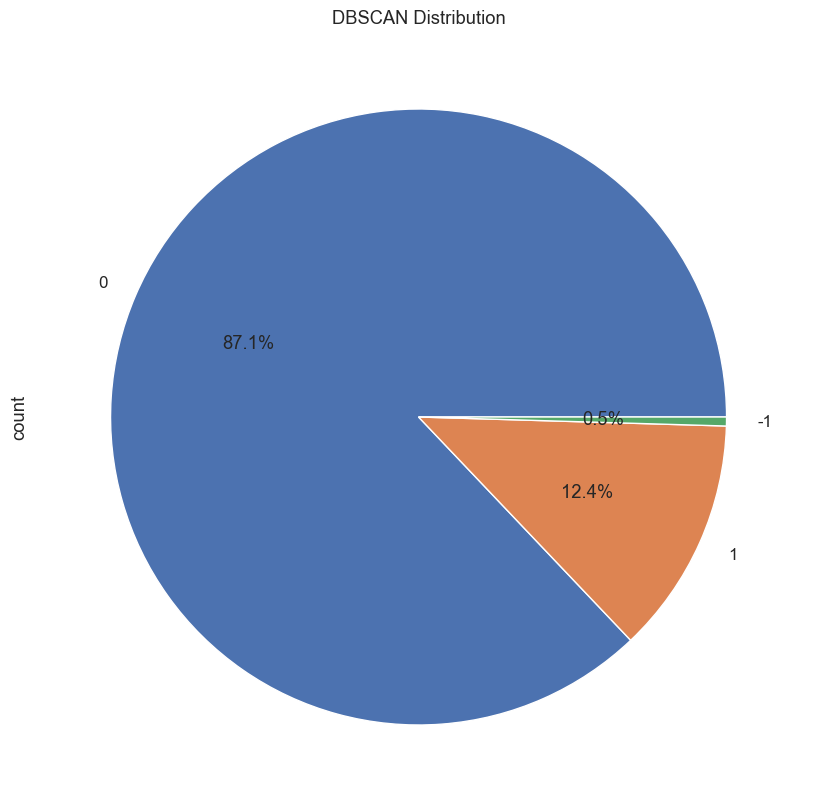

In [123]:
# plot a pie chart of DBSCAN
plt.figure(figsize=(10, 10))
df['DBSCAN'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('DBSCAN Distribution')
plt.show()

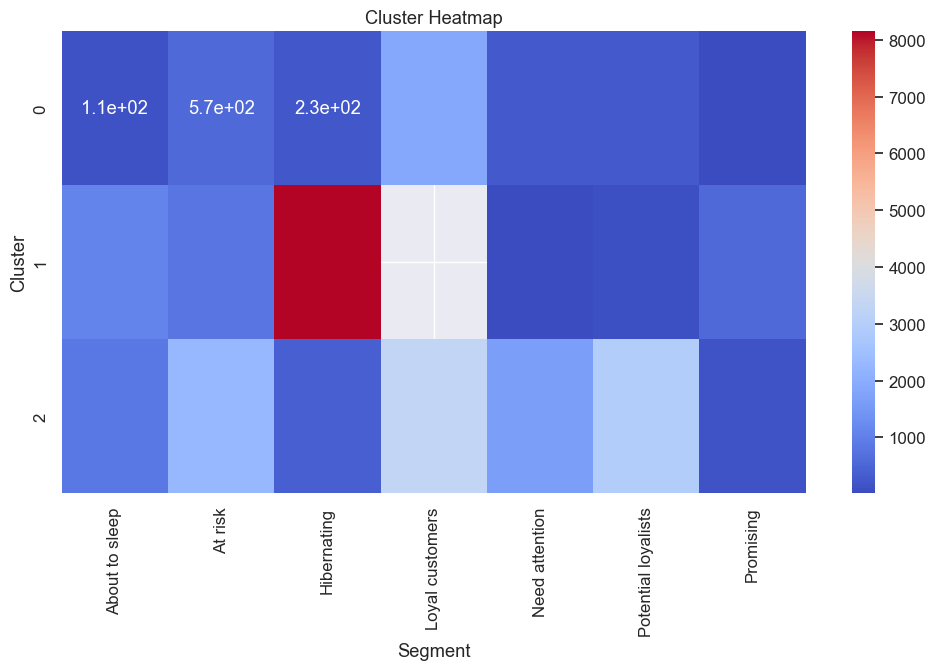

In [133]:
# Plot a cluster heatmap of the clusters
plt.figure(figsize=(12, 6))
sns.heatmap(df.groupby(['Cluster', 'Segment']).size().unstack(), annot=True, cmap='coolwarm')
plt.title('Cluster Heatmap')
plt.show()
